In [1]:
#proviamo alcune reti già presenti su keras addestrate su ImageNet
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import skimage.io as io
import keras

2025-11-06 12:31:35.898033: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-06 12:31:35.908912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762432295.919987    8604 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762432295.923494    8604 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762432295.933070    8604 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

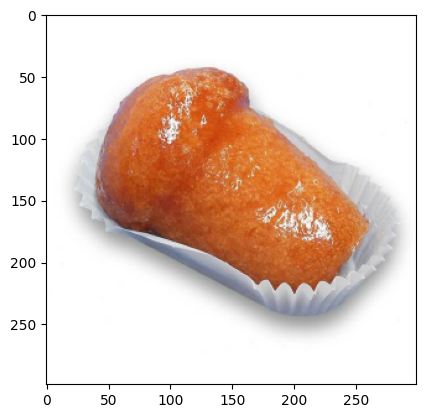

In [2]:
x = np.float32(io.imread('baba.jpg')) #ricordiamo che per la GPU va molto più veloce float32
x2 = np.float32(io.imread('baba.jpg')) #mi serve per il test su MobileNet
x = resize(x,(299,299))
x2 = resize(x2,(224,224))
plt.figure()
plt.imshow(x/255)
plt.show()

In [3]:
#carichiamo la rete
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input, decode_predictions
model = Xception(weights='imagenet')

I0000 00:00:1762432298.523549    8604 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5562 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
input = np.reshape(x, (1,299,299,3)) #4 dimensioni e la possiamo interpretare come un batch di una sola immagine
input = preprocess_input(input)

output = model.predict(input) #facciamo la predizione

#analizziamo l'uscita e prendiamo solo le 5 probabilità più grandi che danno indicazione su come va la rete
preds_d = decode_predictions(output, top=5)[0]
preds_d

I0000 00:00:1762432300.235606    8722 service.cc:152] XLA service 0x7767a0003ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762432300.235641    8722 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2025-11-06 12:31:40.259594: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762432300.460886    8722 cuda_dnn.cc:529] Loaded cuDNN version 91002
2025-11-06 12:31:44.692496: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-06 12:31:44.864068: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, p

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


[('n07684084', 'French_loaf', np.float32(0.36268413)),
 ('n01945685', 'slug', np.float32(0.07094319)),
 ('n07717556', 'butternut_squash', np.float32(0.04118536)),
 ('n07749582', 'lemon', np.float32(0.023864726)),
 ('n07697537', 'hotdog', np.float32(0.02310793))]

In [5]:
#facciamo un test con MobileNet
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input, decode_predictions
model = MobileNet(weights='imagenet')


In [6]:
input2 = np.reshape(x2, (1,224,224,3)) 
input2 = preprocess_input(input2)

output2 = model.predict(input2)
preds_d = decode_predictions(output2, top=5)[0]
preds_d

2025-11-06 12:31:58.606809: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-06 12:31:58.777579: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


[('n07684084', 'French_loaf', np.float32(0.32778463)),
 ('n07745940', 'strawberry', np.float32(0.2570981)),
 ('n07697537', 'hotdog', np.float32(0.11095375)),
 ('n07615774', 'ice_lolly', np.float32(0.09724435)),
 ('n07717556', 'butternut_squash', np.float32(0.07344359))]